In [ ]:
import numpy as np


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
data=np.load("/content/drive/My Drive/Colab Notebooks/whole/data.npy", mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [ ]:
data.shape

(1280, 34160)

In [ ]:
labels=np.load("/content/drive/My Drive/Colab Notebooks/whole/labels.npy", mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [ ]:
labels.shape

(1280, 4)

# Classification into low or high valence by taking median as threshold

# Valence classification

In [ ]:
V_Y=labels[:,0]


In [ ]:
np.median(labels[:,0])

5.04

In [ ]:
ahr=5
V_Y=V_Y>ahr
V_Y=V_Y.astype(int)
V_Y

array([1, 1, 1, ..., 0, 0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


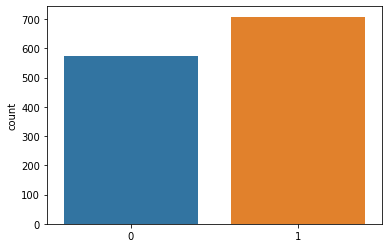

In [ ]:
sns.countplot(V_Y)

both low and high exists in equal strength. because we have taken the threshold as median threshold ca also be maually set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,V_Y,test_size=0.25,random_state=10)

In [ ]:
model = Sequential()
model.add(Dense(2048, input_dim=34160, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2048)              69961728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 71,084,801
Trainable params: 71,084,801
Non-trainable params: 0
__________________________________________

In [ ]:
history=model.fit(X_train, y_train, epochs=300, batch_size=40,validation_data=(X_val,y_val))

Epoch 1/300
18/18 [==============================] - 1s 38ms/step - loss: 18.9674 - accuracy: 0.6139 - val_loss: 53.3198 - val_accuracy: 0.4042
Epoch 2/300
18/18 [==============================] - 1s 36ms/step - loss: 12.8735 - accuracy: 0.6208 - val_loss: 31.5133 - val_accuracy: 0.5000
Epoch 3/300
18/18 [==============================] - 1s 36ms/step - loss: 16.6534 - accuracy: 0.6000 - val_loss: 33.2364 - val_accuracy: 0.5000
Epoch 4/300
18/18 [==============================] - 1s 36ms/step - loss: 42.4818 - accuracy: 0.6111 - val_loss: 50.8406 - val_accuracy: 0.6417
Epoch 5/300
18/18 [==============================] - 1s 36ms/step - loss: 110.6818 - accuracy: 0.5653 - val_loss: 59.3522 - val_accuracy: 0.5625
Epoch 6/300
18/18 [==============================] - 1s 36ms/step - loss: 155.2010 - accuracy: 0.5389 - val_loss: 200.7784 - val_accuracy: 0.4208
Epoch 7/300
18/18 [==============================] - 1s 36ms/step - loss: 135.0856 - accuracy: 0.5556 - val_loss: 59.2294 - val_accur

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 12ms/step - loss: 5.0936 - accuracy: 0.6042


[5.093642234802246, 0.6041666865348816]

In [ ]:
model.evaluate(data,V_Y)

6/6 [==============================] - 0s 13ms/step - loss: 5.0936 - accuracy: 0.6042


[5.093642234802246, 0.6041666865348816]

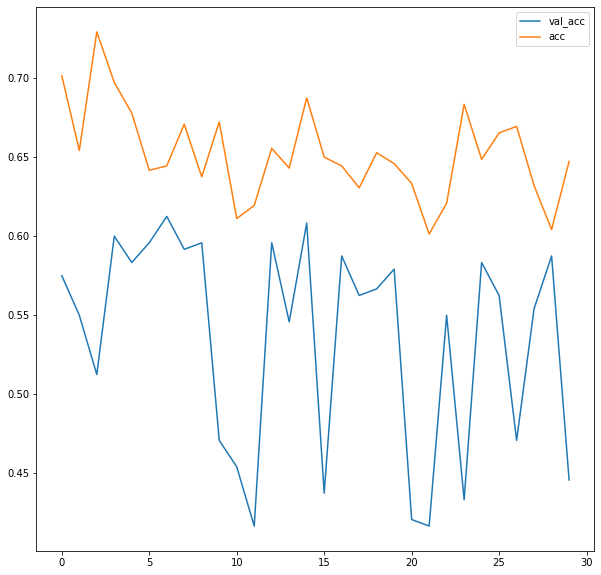

In [ ]:
hist = history.history

val_mse = hist['val_accuracy']
mse = hist['accuracy']

plt.figure(figsize = (10,10))
plt.plot(list(range(len(val_mse))),val_mse,label='val_acc')
plt.plot(list(range(len(mse))),mse,label='acc')
plt.legend()
plt.show()

# Arousal

In [ ]:
np.median(labels[:,1])

5.23

In [ ]:
A_Y=labels[:,1]
ahr=5
A_Y=A_Y>ahr
A_Y=A_Y.astype(int)
A_Y

In [ ]:
sns.countplot(A_Y)

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(data,A_Y,test_size=0.25)

In [ ]:
X1_train,X1_val,y1_train,y1_val=train_test_split(X1_train,y1_train,test_size=0.25)

In [ ]:
model1 = Sequential()
model1.add(Dense(2048, input_dim=34160, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              69961728  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 71,084,801
Trainable params: 71,084,801
Non-trainable params: 0
__________________________________________

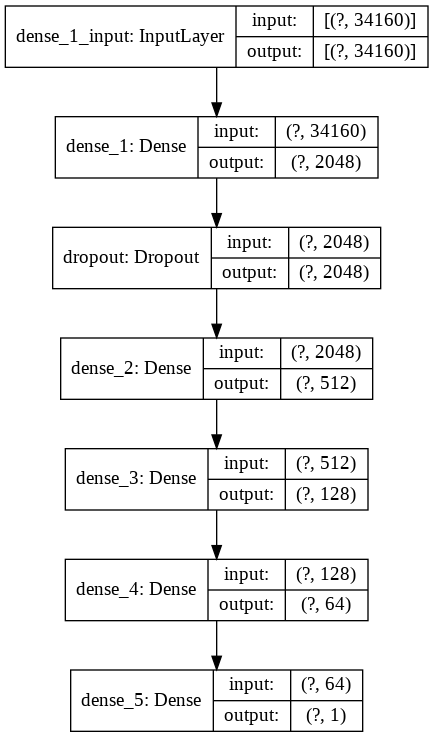

In [ ]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history1=model1.fit(X1_train, y1_train, epochs=100, batch_size=60,validation_data=(X1_val,y1_val))

Epoch 1/100
7/7 [==============================] - 0s 42ms/step - loss: 79112.9062 - accuracy: 0.4988 - val_loss: 136102.4219 - val_accuracy: 0.4000
Epoch 2/100
7/7 [==============================] - 0s 27ms/step - loss: 88750.3047 - accuracy: 0.4988 - val_loss: 29931.7559 - val_accuracy: 0.6000
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 27499.3457 - accuracy: 0.5062 - val_loss: 31802.0918 - val_accuracy: 0.6000
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 21350.9238 - accuracy: 0.5062 - val_loss: 26257.0645 - val_accuracy: 0.6000
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 18330.7402 - accuracy: 0.5778 - val_loss: 18496.4023 - val_accuracy: 0.4000
Epoch 6/100
7/7 [==============================] - 0s 23ms/step - loss: 11116.4678 - accuracy: 0.6049 - val_loss: 3092.0647 - val_accuracy: 0.4444
Epoch 7/100
7/7 [==============================] - 0s 24ms/step - loss: 5818.8901 - accuracy: 0.4963 - val_loss:

In [ ]:
model1.evaluate(X1_test,y1_test)

10/10 [==============================] - 0s 5ms/step - loss: 135.4124 - accuracy: 0.6281


[135.41236877441406, 0.628125011920929]

In [ ]:
model1.evaluate(data,A_Y)

40/40 [==============================] - 0s 5ms/step - loss: 116.3505 - accuracy: 0.6391


[116.35047912597656, 0.6390625238418579]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


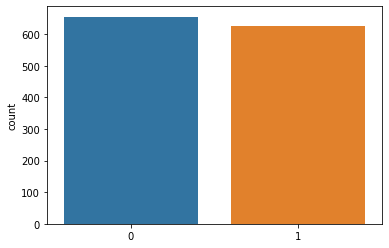

In [ ]:
sns.countplot(model1.predict_classes(data)[:,0])

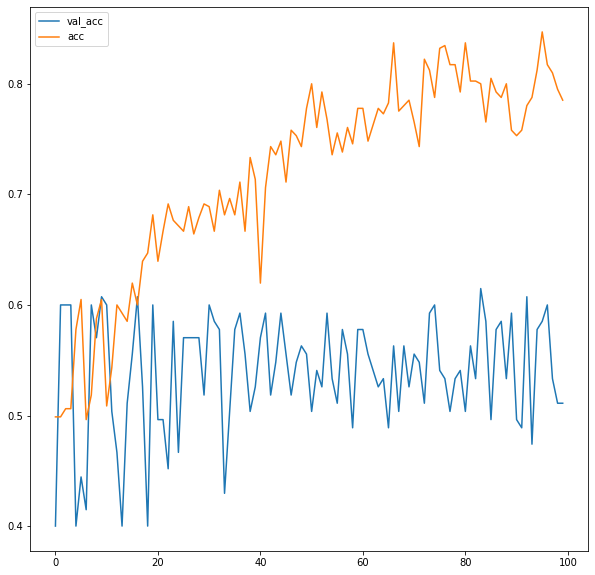

In [ ]:
hist = history1.history

val_mse = hist['val_accuracy']
mse = hist['accuracy']

plt.figure(figsize = (10,10))
plt.plot(list(range(len(val_mse))),val_mse,label='val_acc')
plt.plot(list(range(len(mse))),mse,label='acc')
plt.legend()
plt.show()

In [ ]:
np.reshape(model1.predict_classes(data)[:,0],(-1,20))

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 1]], dtype=int32)

# Dominance

In [ ]:
np.median(labels[:,2])

5.24

In [ ]:
D_Y=labels[:,2]
ahr=np.median(labels[:,2])
D_Y=D_Y>ahr
D_Y=D_Y.astype(int)
D_Y

array([1, 1, 1, ..., 0, 0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


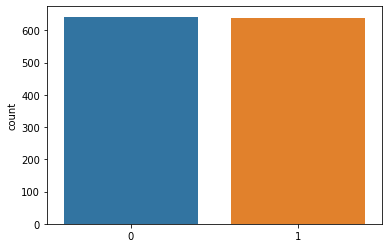

In [ ]:
sns.countplot(D_Y)

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(data,D_Y,test_size=0.25)

In [ ]:
X2_train,X2_val,y2_train,y2_val=train_test_split(X2_train,y2_train,test_size=0.25)

In [ ]:
model2 = Sequential()
model2.add(Dense(2048, input_dim=34160, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              69961728  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 71,084,801
Trainable params: 71,084,801
Non-trainable params: 0
____________________________________________

In [ ]:
history2=model2.fit(X2_train, y2_train, epochs=100, batch_size=60,validation_data=(X2_val,y2_val))

Epoch 1/100
12/12 [==============================] - 6s 523ms/step - loss: 71392.8359 - accuracy: 0.5056 - val_loss: 32594.8496 - val_accuracy: 0.4417
Epoch 2/100
12/12 [==============================] - 6s 511ms/step - loss: 22091.4941 - accuracy: 0.5319 - val_loss: 12549.5615 - val_accuracy: 0.4417
Epoch 3/100
12/12 [==============================] - 6s 507ms/step - loss: 23453.0605 - accuracy: 0.5042 - val_loss: 8257.9561 - val_accuracy: 0.5583
Epoch 4/100
12/12 [==============================] - 6s 506ms/step - loss: 9486.1426 - accuracy: 0.5389 - val_loss: 1620.0647 - val_accuracy: 0.5917
Epoch 5/100
12/12 [==============================] - 6s 510ms/step - loss: 6850.1040 - accuracy: 0.5000 - val_loss: 10090.6377 - val_accuracy: 0.4417
Epoch 6/100
12/12 [==============================] - 6s 508ms/step - loss: 4719.6694 - accuracy: 0.5347 - val_loss: 1811.7509 - val_accuracy: 0.5625
Epoch 7/100
12/12 [==============================] - 6s 503ms/step - loss: 3947.3281 - accuracy: 0.5

In [ ]:
model2.evaluate(X2_test,y2_test)

10/10 [==============================] - 1s 103ms/step - loss: 105.4392 - accuracy: 0.6281


[105.4392318725586, 0.628125011920929]

In [ ]:
model2.evaluate(data,D_Y)

40/40 [==============================] - 4s 112ms/step - loss: 40.0779 - accuracy: 0.7859


[40.0778694152832, 0.785937488079071]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


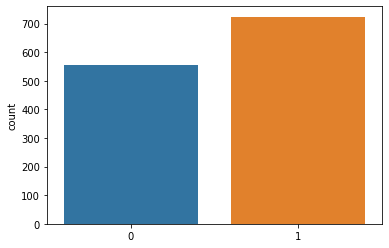

In [ ]:
sns.countplot(model2.predict_classes(data)[:,0])

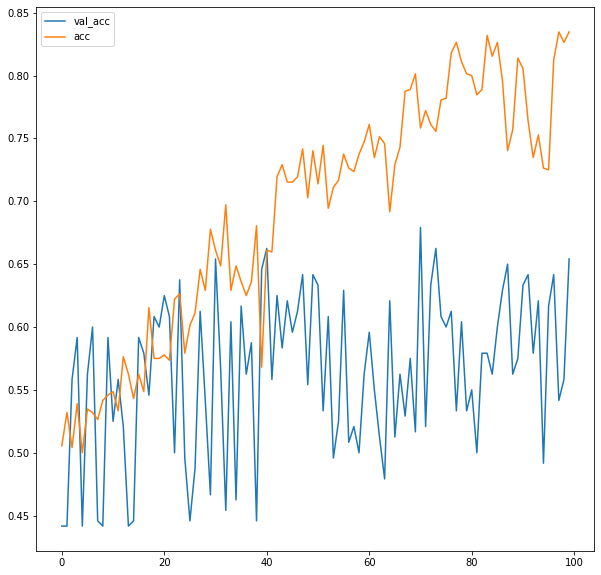

In [ ]:
hist = history2.history

val_mse = hist['val_accuracy']
mse = hist['accuracy']

plt.figure(figsize = (10,10))
plt.plot(list(range(len(val_mse))),val_mse,label='val_acc')
plt.plot(list(range(len(mse))),mse,label='acc')
plt.legend()
plt.show()

# Liking

In [ ]:
np.median(labels[:,3])

6.05

In [ ]:
L_Y=labels[:,3]
ahr=5
L_Y=L_Y>ahr
L_Y=L_Y.astype(int)
L_Y

array([1, 1, 1, ..., 0, 0, 0])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


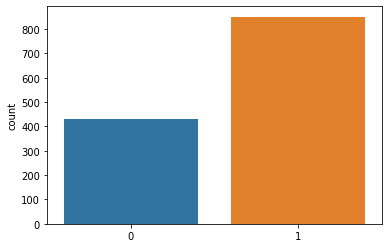

In [ ]:
sns.countplot(L_Y)

In [ ]:
X3_train,X3_test,y3_train,y3_test=train_test_split(data,L_Y,test_size=0.25)

In [ ]:
X3_train,X3_val,y3_train,y3_val=train_test_split(X3_train,y3_train,test_size=0.25)

In [ ]:
model3 = Sequential()
model3.add(Dense(2048, input_dim=34160, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              69961728  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 71,080,641
Trainable params: 71,080,641
Non-trainable params: 0
____________________________________________

In [ ]:
history=model3.fit(X3_train, y3_train, epochs=100, batch_size=60,validation_data=(X3_val,y3_val))

Epoch 1/100
12/12 [==============================] - 0s 37ms/step - loss: 95589.4297 - accuracy: 0.5528 - val_loss: 25745.2324 - val_accuracy: 0.5958
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 21911.4336 - accuracy: 0.5667 - val_loss: 21926.6348 - val_accuracy: 0.4042
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 18718.0352 - accuracy: 0.5236 - val_loss: 20399.7578 - val_accuracy: 0.5958
Epoch 4/100
12/12 [==============================] - 0s 21ms/step - loss: 16535.4590 - accuracy: 0.5375 - val_loss: 4961.2676 - val_accuracy: 0.6208
Epoch 5/100
12/12 [==============================] - 0s 21ms/step - loss: 13045.5723 - accuracy: 0.5556 - val_loss: 11413.7305 - val_accuracy: 0.5958
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 10897.8447 - accuracy: 0.5542 - val_loss: 10383.7539 - val_accuracy: 0.5958
Epoch 7/100
12/12 [==============================] - 0s 22ms/step - loss: 9015.7607 - accuracy: 0.572

In [ ]:
model3.evaluate(X3_test,y3_test)

10/10 [==============================] - 0s 5ms/step - loss: 160.1632 - accuracy: 0.5844


[160.1632080078125, 0.5843750238418579]

In [ ]:
model3.evaluate(data,L_Y)

40/40 [==============================] - 0s 5ms/step - loss: 75.4301 - accuracy: 0.7000


[75.43010711669922, 0.699999988079071]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


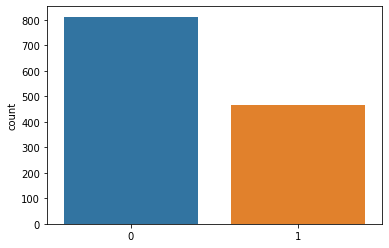

In [ ]:
sns.countplot(model.predict_classes(data)[:,0])

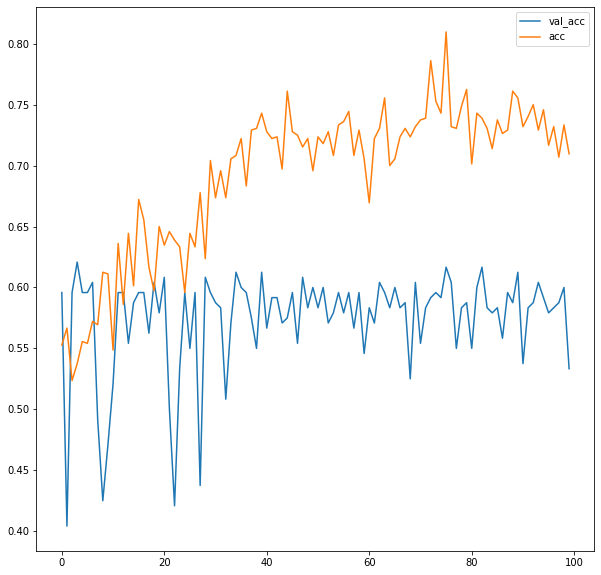

In [ ]:
hist = history.history

val_mse = hist['val_accuracy']
mse = hist['accuracy']

plt.figure(figsize = (10,10))
plt.plot(list(range(len(val_mse))),val_mse,label='val_acc')
plt.plot(list(range(len(mse))),mse,label='acc')
plt.legend()
plt.show()